<h1 style="text-align: center;">Experiment-3</h1>
<h1 style="text-align: center;">Linear Regression</h1>

Linear regression is a statistical method used to model the relationship between a dependent variable and one or more independent variables. It provides valuable insights for prediction and data analysis. Linear regression is also a type of supervised machine-learning algorithm that learns from the labelled datasets and maps the data points with most optimized linear functions which can be used for prediction on new datasets. It computes the linear relationship between the dependent variable and one or more independent features by fitting a linear equation with observed data. It predicts the continuous output variables based on the independent input variable.

For example if we want to predict house price we consider various factor such as house age, distance from the main road, location, area and number of room, linear regression uses all these parameter to predict house price as it consider a linear relation between all these features and price of house.

## Simple Linear Regression from Scratch

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Reading Data
data = pd.read_csv('score.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# Collecting X and Y
X = data['Hours'].values
Y = data['Scores'].values

In [6]:
# Calculating coefficient

# Mean X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

# Total number of values
n = len(X)

# Using the formula to calculate b1 and b2
xy = 0
xx = 0
for i in range(n):
    xy += (X[i] - mean_x) * (Y[i] - mean_y) #derived formula
    xx += (X[i] - mean_x) ** 2
b1 = xy / xx
b0 = mean_y - (b1 * mean_x)

# Printing coefficients
print(b1, b0)

9.775803390787475 2.4836734053731746


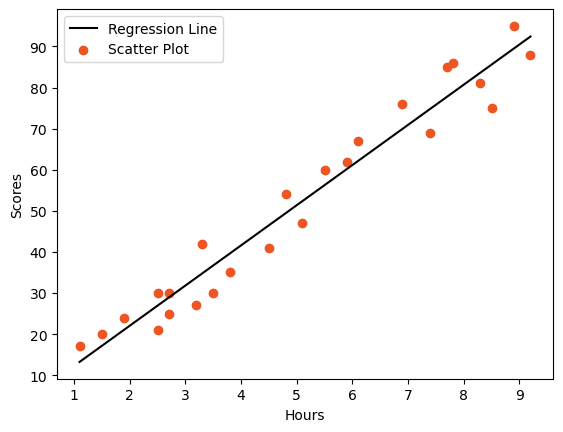

In [9]:
max_x = np.max(X)
min_x = np.min(X)

# Calculating line values x and y
x = np.linspace(min_x, max_x, 1200)
y = b0 + b1 * x

# Ploting Line
plt.plot(x, y, color='black', label='Regression Line')

# Ploting Scatter Points
plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()

In [10]:
# Calculating Root Mean Squares Error
rmse = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    rmse += (Y[i] - y_pred) ** 2
rmse = np.sqrt(rmse/n)
print(rmse)

5.374265578592621


In [11]:
# Calculating R2 Score
ss_tot = 0
ss_res = 0
for i in range(n):
    y_pred = b0 + b1 * X[i]
    ss_tot += (Y[i] - mean_y) ** 2
    ss_res += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_res/ss_tot)
print(r2)

0.9529481969048356


## Simple Linear Regression using Inbuilt Functions

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

In [14]:
# Get dataset
df_sal = pd.read_csv('score.csv')
df_sal.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [15]:
# Describe data
df_sal.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


C:\Users\aditi\AppData\Local\Temp\ipykernel_7480\953299188.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_sal['Scores'])


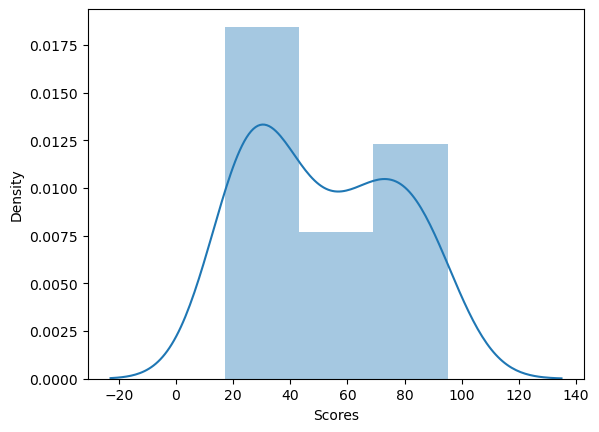

In [16]:
# Data distribution
sns.distplot(df_sal['Scores'])
plt.show()

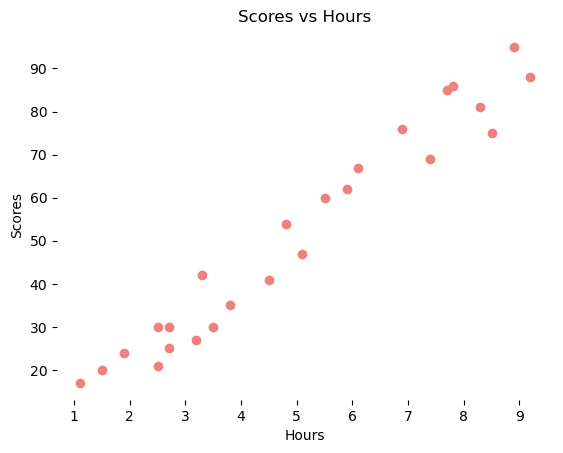

In [17]:
# Relationship between Scores and Hours
plt.scatter(df_sal['Hours'], df_sal['Scores'], color = 'lightcoral')
plt.title('Scores vs Hours')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.box(False)
plt.show()

In [18]:
# Splitting variables
X = df_sal.iloc[:, :1]  # independent
y = df_sal.iloc[:, 1:]  # dependent

In [19]:
# Splitting dataset into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [20]:
# Regressor model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
# Prediction result
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)   # predicted value of y_train

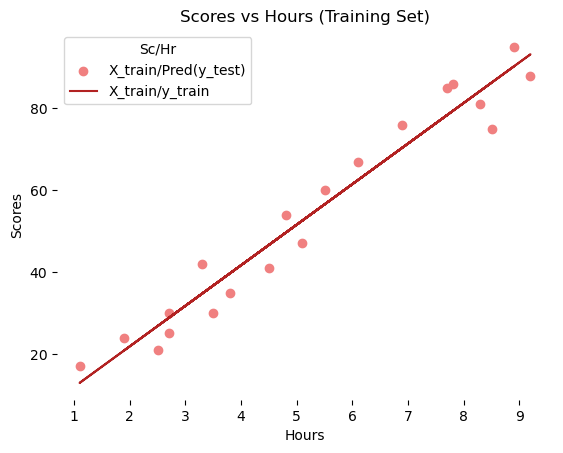

In [23]:
# Prediction on training set
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Scores vs Hours (Training Set)')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Sc/Hr', loc='best', facecolor='white')
plt.box(False)
plt.show()

In [24]:
# Regressor coefficients and intercept
print(f'Coefficient: {regressor.coef_}')
print(f'Intercept: {regressor.intercept_}')

Coefficient: [[9.91065648]]
Intercept: [2.01816004]


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error:", mse)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred_train)
print("Mean Absolute Error:", mae)

# R2 score (R2)
r2score = r2_score(y_train, y_pred_train)
print("R2 Score:", r2score)

Mean Squared Error: 30.89818237731452
Mean Absolute Error: 5.186601709180368
R2 Score: 0.9515510725211552
